In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
marketing_df = pd.read_csv(r"D:/Projects/Marketing A_B testing/marketing_AB.csv")

In [4]:
marketing_df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
# Cheking for duplicate rows
marketing_df.duplicated().sum()

0

In [8]:
# Unnamed: 0 and user id columns are not relevent for analysis. So we can remove them
marketing_df.drop(columns=['Unnamed: 0','user id'],axis=1,inplace=True)

In [9]:
marketing_df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [10]:
# Converting to appropiate datatypes. most ads hour should be treated as categorical for analysis
marketing_df['converted'] = marketing_df['converted'].astype('object')
marketing_df['most ads hour'] = marketing_df['most ads hour'].astype('object')

In [11]:
marketing_df.dtypes

test group       object
converted        object
total ads         int64
most ads day     object
most ads hour    object
dtype: object

In [12]:
# Checking for missing values
marketing_df.isnull().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [13]:
categorical_cols = marketing_df.select_dtypes(include='object').columns.to_list()
categorical_cols

['test group', 'converted', 'most ads day', 'most ads hour']

In [19]:
# Checking the unique values for categorical columns
for i in categorical_cols:
    print(i,marketing_df[i].unique())

test group ['ad' 'psa']
converted [False True]
most ads day ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour [20 22 18 10 14 13 19 11 12 16 21 3 23 4 8 0 2 15 1 6 17 7 9 5]


In [20]:
# Checking the statistics for numerical columns
marketing_df.describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


### Univariate analysis

test group
ad     96.0
psa     4.0
Name: count, dtype: float64


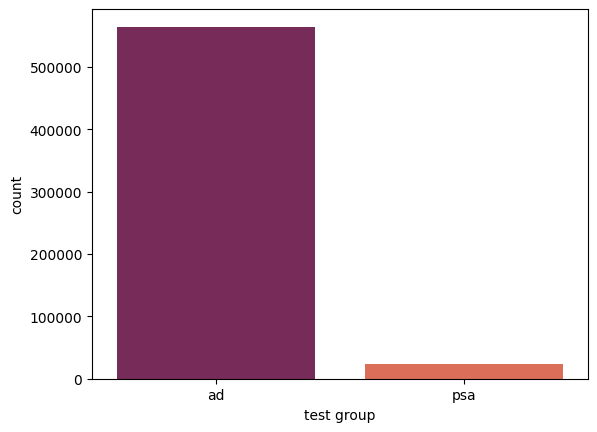

converted
False    97.48
True      2.52
Name: count, dtype: float64


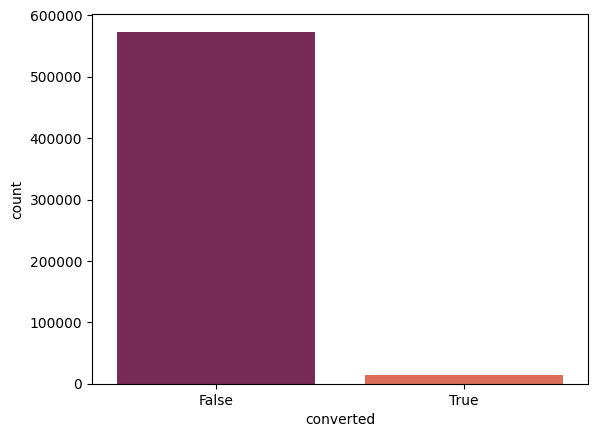

most ads day
Friday       15.75
Monday       14.81
Sunday       14.52
Thursday     14.11
Saturday     13.89
Wednesday    13.76
Tuesday      13.17
Name: count, dtype: float64


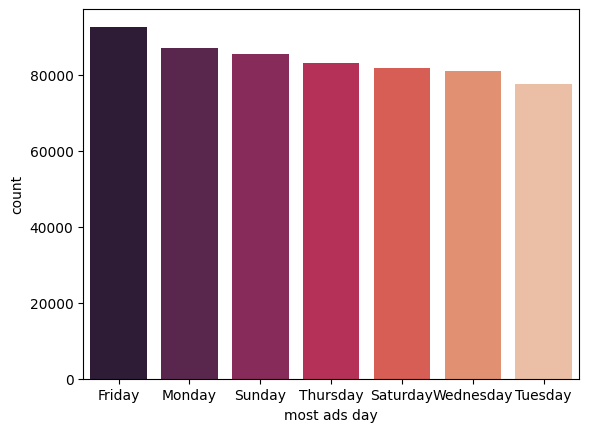

most ads hour
13    8.10
12    8.04
11    7.86
14    7.76
15    7.60
10    6.62
16    6.39
17    5.95
18    5.50
9     5.27
19    5.16
21    5.10
20    4.92
22    4.49
23    3.43
8     3.00
7     1.09
0     0.94
2     0.91
1     0.82
3     0.46
6     0.35
5     0.13
4     0.12
Name: count, dtype: float64


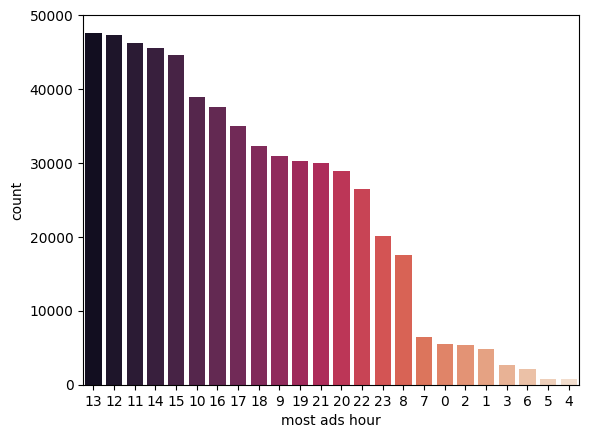

In [37]:
# Categorical variables
for i in categorical_cols:
    print((round(marketing_df[i].value_counts()/len(marketing_df)*100,2)).sort_values(ascending=False))
    category_order = marketing_df[i].value_counts().index
    sns.countplot(x=i,data=marketing_df,order=category_order,palette='rocket')
    plt.show()

Ad Distribution:
The majority of the test group has been exposed to advertisements, accounting for 96% of the total content shown, with the remaining 4% consisting of Public Service Announcements (PSAs).

Ad Conversion Rate:
Of the ads shown, only 2% have resulted in conversions (sales or revenue), indicating a low conversion rate.

Ad View Distribution by Day:
There is a relatively consistent distribution of ads viewed throughout the week. However, Friday stands out as the day with the highest ad exposure, representing 16% of total ads viewed, while Tuesday has the least, with 13%.

Peak Viewing Time:
The majority of ad views occur around 1:00 PM, marking the peak time for ad exposure. On the other hand, ad views are minimal between 1:00-5:00 AM, representing the least active time for ad engagement.


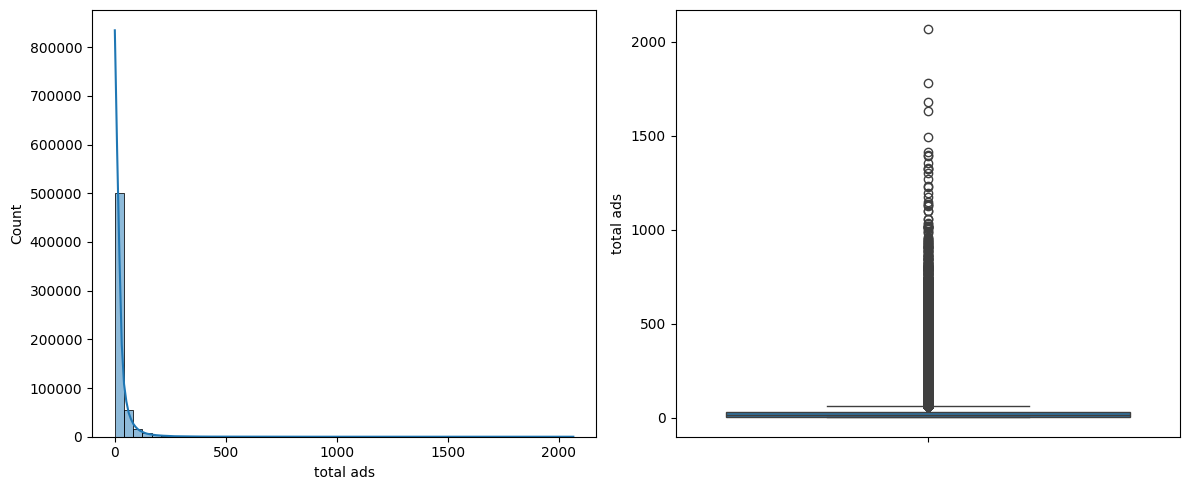

In [43]:
# Numerical variable
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(marketing_df['total ads'],kde=True,bins=50)

plt.subplot(1,2,2)
sns.boxplot(marketing_df['total ads'])

plt.tight_layout()
plt.show()


In [44]:
marketing_df.describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


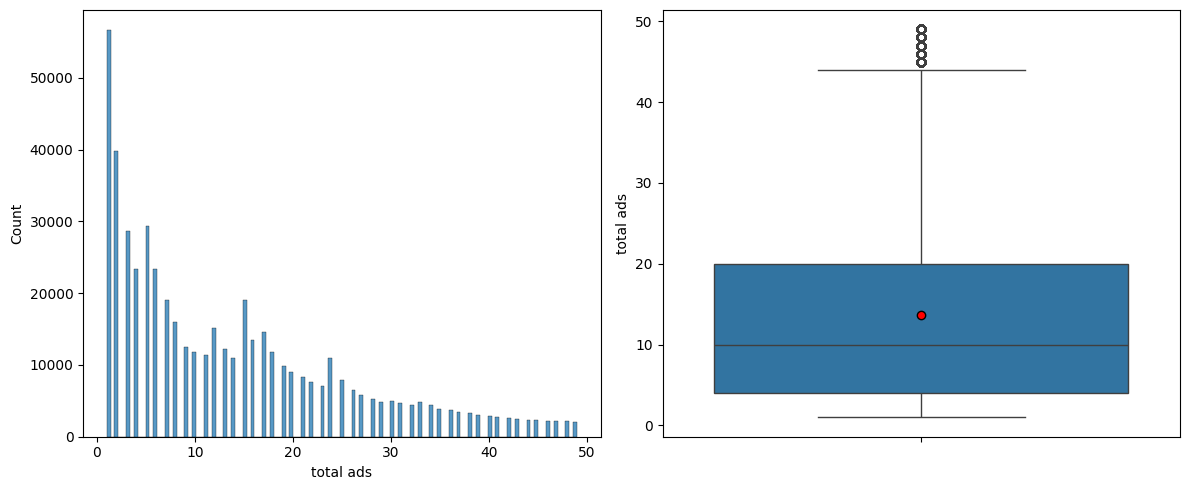

In [87]:
# Most of the total ads data have outliers and skwed.So we need to filter the data without outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x='total ads',data=marketing_df[marketing_df['total ads'] < 50])

plt.subplot(1,2,2)
sns.boxplot(y='total ads',data= marketing_df[marketing_df['total ads'] < 50],showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

plt.tight_layout()
plt.show()

On average, each person views approximately 15 ads, indicating a moderate level of exposure per individual.

### Bivariate Analysis

In [51]:
marketing_df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


converted       False     True 
test group                     
ad          97.445344  2.554656
psa         98.214589  1.785411


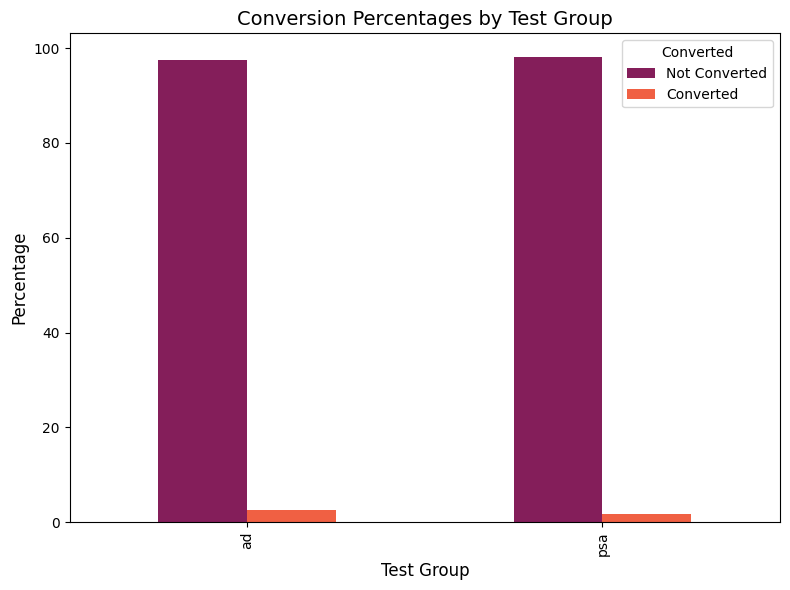

In [113]:
# test group and converted analysis
crosstab = pd.crosstab(marketing_df['test group'], marketing_df['converted'])
percentage_crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
print(percentage_crosstab)

colors = sns.color_palette('rocket', n_colors=len(percentage_crosstab.columns))
percentage_crosstab.plot(kind='bar', stacked=False, figsize=(8, 6), color=colors)
plt.title('Conversion Percentages by Test Group', fontsize=14)
plt.xlabel('Test Group', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Converted', labels=['Not Converted', 'Converted'], fontsize=10)
plt.tight_layout()
plt.show()

Conversion rates for Ads stand at 2.5%, while PSAs have a conversion rate of 1.8%. This indicates a 0.7% increase in conversions or product purchases for ads compared to PSAs.

converted         False     True 
most ads day                     
Friday        97.778810  2.221190
Monday        96.718845  3.281155
Saturday      97.894930  2.105070
Sunday        97.552435  2.447565
Thursday      97.842906  2.157094
Tuesday       97.015966  2.984034
Wednesday     97.505809  2.494191


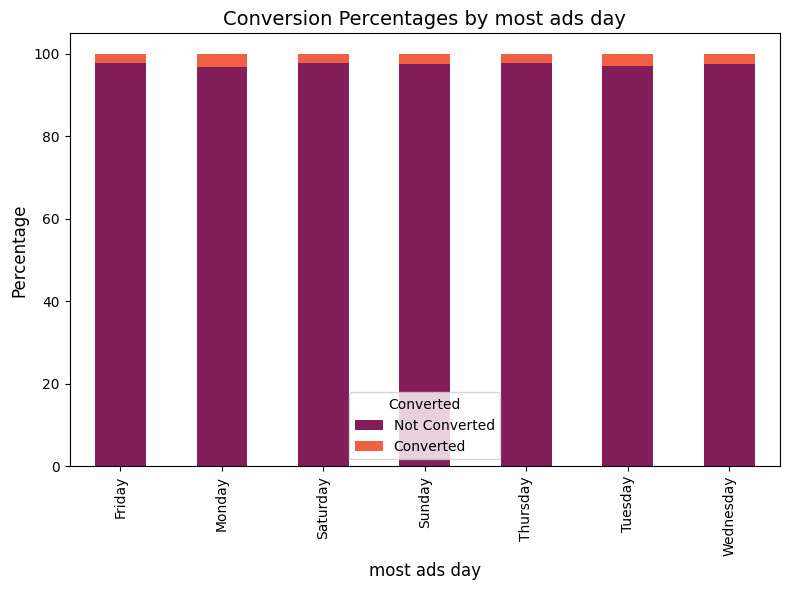

In [107]:
# most ads day and converted analysis
crosstab = pd.crosstab(marketing_df['most ads day'], marketing_df['converted'])
percentage_crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
print(percentage_crosstab)

colors = sns.color_palette('rocket', n_colors=len(percentage_crosstab.columns))
percentage_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)
plt.title('Conversion Percentages by most ads day', fontsize=14)
plt.xlabel('most ads day', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Converted', labels=['Not Converted', 'Converted'], fontsize=10)
plt.tight_layout()
plt.show()

Conversion rates remain relatively consistent throughout the week, with Monday and Tuesday showing slightly higher rates at 3%, while Saturday has the lowest rate at 2%. This indicates minimal variation in performance across days.

converted          False     True 
most ads hour                     
0              98.157514  1.842486
1              98.708871  1.291129
2              99.268704  0.731296
3              98.954834  1.045166
4              98.476454  1.523546
5              97.908497  2.091503
6              97.775629  2.224371
7              98.188915  1.811085
8              98.048448  1.951552
9              98.080893  1.919107
10             97.847916  2.152084
11             97.788357  2.211643
12             97.617235  2.382765
13             97.532263  2.467737
14             97.193743  2.806257
15             97.034666  2.965334
16             96.922831  3.077169
17             97.179033  2.820967
18             97.262012  2.737988
19             97.328018  2.671982
20             97.019673  2.980327
21             97.107686  2.892314
22             97.389528  2.610472
23             97.733809  2.266191


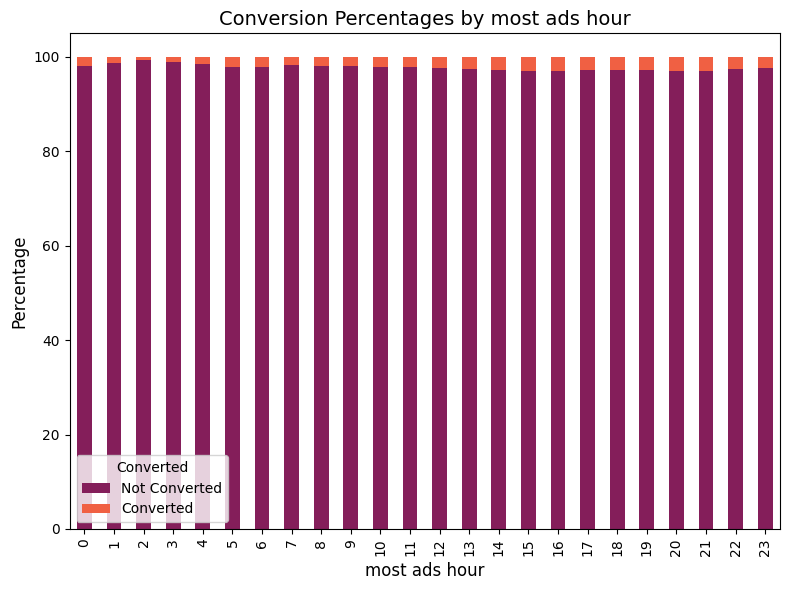

In [106]:
# most ads hour and converted analysis
crosstab = pd.crosstab(marketing_df['most ads hour'], marketing_df['converted'])
percentage_crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
print(percentage_crosstab)

colors = sns.color_palette('rocket', n_colors=len(percentage_crosstab.columns))
percentage_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)
plt.title('Conversion Percentages by most ads hour', fontsize=14)
plt.xlabel('most ads hour', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Converted', labels=['Not Converted', 'Converted'], fontsize=10)
plt.tight_layout()
plt.show()

Conversion rates show minimal variation throughout the day, similar to the trends observed across the week. However, 4 PM and 8 PM stand out with a slightly higher conversion rate of 3%, while 2 AM records the lowest rate, falling below 1%, likely due to the reduced number of ads seen during this time, as highlighted earlier.

           Average ads
converted             
False        13.521606
True         26.864967


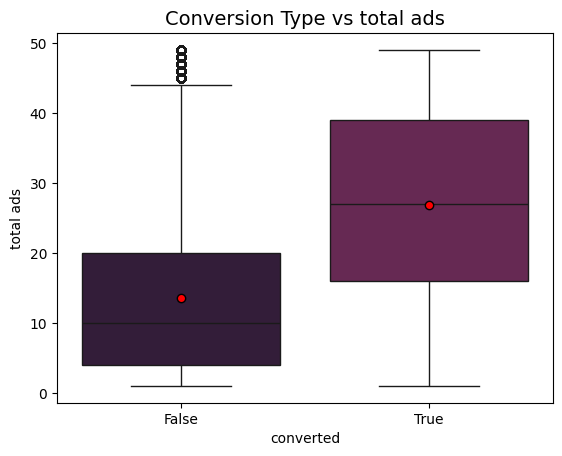

In [119]:
# total ads and converted analysis
tot_ads_conv = marketing_df[marketing_df['total ads'] < 50].groupby('converted').agg({'total ads':'mean'})
tot_ads_conv.rename(columns={'total ads':'Average ads'},inplace=True)
print(tot_ads_conv)

sns.set_palette("rocket")
sns.boxplot(x='converted', y='total ads', hue='converted', data=marketing_df[marketing_df['total ads'] < 50], 
            showmeans=True, 
            meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})
plt.title('Conversion Type vs total ads', fontsize=14)
plt.legend([], [], frameon=False)
plt.show()


There is a notable difference in conversion rates based on the total ads seen by an individual. On average, a person views approximately 27 ads for a conversion or sale to occur. Notably, conversions are not observed when fewer than 20 ads are seen, emphasizing the importance of achieving a minimum threshold of ad exposure.

#### Statistical tests

Null Hypothesis (H₀): The conversion rate remains consistent regardless of the test group, the day with the most ads, or the hour with the most ads.

Alternative Hypothesis (H₁): The conversion rate varies based on the test group, the day with the most ads, or the hour with the most ads.

If P-value is less than alpha, then we reject the null hypothesis.

In [109]:
# Chi-square test to find relations between converted and other categorical columns
from scipy.stats import chi2_contingency
alpha = 0.05
for i in categorical_cols:
    if i!='converted':
        contingency_table = pd.crosstab(marketing_df[i], marketing_df['converted'])
        
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"Chi-Square Test Results for {i} vs converted :")
        print(f"Chi-Square Statistic: {chi2}")
        print(f"P-Value: {p}")
        print(f"Degrees of Freedom: {dof}")
        print()
        if p < alpha:
            print(f"There is variation in conversion rates across {i}, which is statistically validated.")
        else:
            print(f"There is no significant variation in conversion rates across {i}")
        print()



Chi-Square Test Results for test group vs converted :
Chi-Square Statistic: 54.005823883685245
P-Value: 1.9989623063390075e-13
Degrees of Freedom: 1

There is variation in conversion rates across test group, which is statistically validated.

Chi-Square Test Results for most ads day vs converted :
Chi-Square Statistic: 410.0478857936585
P-Value: 1.932184379244731e-85
Degrees of Freedom: 6

There is variation in conversion rates across most ads day, which is statistically validated.

Chi-Square Test Results for most ads hour vs converted :
Chi-Square Statistic: 430.76869230822086
P-Value: 8.027629823696771e-77
Degrees of Freedom: 23

There is variation in conversion rates across most ads hour, which is statistically validated.



Conclusions from Tests and Analysis:

Minimal Impact of Ad Exposure: While ad exposure does have an effect, it leads to only minor variations in conversion rates across the test groups, indicating that other factors may play a more significant role in driving conversions.

Day of the Week Influences Effectiveness: The performance of ads is influenced by the day of the week, with certain days showing higher conversion rates. Understanding this pattern can help optimize ad delivery for better results.

Timing Plays a Crucial Role: The time of day when ads are shown has a significant impact on conversion rates. Tailoring the timing of ads to align with peak engagement hours can enhance overall performance.


Recommendations:

Focus on High-Performing Days: Given the current conversion rate of 0.7% for the ads campaign, it would be advantageous to increase ad exposure on high-performing days, such as Monday and Tuesday, which already show higher conversion rates. By optimizing ad placements on these days, we can capitalize on higher engagement and potentially boost conversions.

Experiment on Low-Performing Days: Consider running targeted or experimental ads on Saturday, which currently shows lower conversion rates. This approach will help investigate the reasons behind the performance gap and uncover potential opportunities to improve engagement and conversions on days with weaker results. While experimentation can be valuable, the primary focus should be on amplifying ads on the highest-performing days.

Target High-Performing Time Slots: 4 PM and 8 PM stand out as time slots with slightly higher conversion rates (3%). These periods represent optimal windows for ad exposure and are key for maximizing engagement and conversions. Increasing ad spend during these hours can lead to more effective outcomes.

Minimize Exposure During Low-Performing Time Slots: Conversion rates are significantly lower during 1-2 AM, likely due to reduced ad visibility and engagement. Reducing or avoiding ad exposure during these hours will allow for better allocation of budget and resources, ensuring ads are shown at times when users are more likely to engage.

To improve conversion rates, it is essential to ensure that individuals are exposed to a minimum of 20 ads. Conversions are not observed below this threshold, so increasing ad frequency for users who have seen fewer than 20 ads could significantly boost conversions.